In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter
df = pd.read_csv("../Clean Data/US_Cleaned.csv")
df.info()

<ipython-input-1-dd5d9eb2dce8>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1101 non-null   object 
 1   PX_LAST      1101 non-null   float64
 2   PX_VOLUME_x  1101 non-null   int64  
 3   VIX          1101 non-null   float64
 4   SOFR3M       1101 non-null   float64
 5   PX_BID       1101 non-null   float64
 6   PX_VOLUME_y  1101 non-null   float64
 7   PX_ASK       1101 non-null   float64
 8   PX_SPREAD    1101 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 73.2+ KB


In [43]:
df[["Date","PX_LAST","PX_VOLUME_x","VIX","SOFR3M","PX_SPREAD"]].describe()

,PX_LAST,PX_VOLUME_x,VIX,SOFR3M,PX_SPREAD
count,1101.000000,1.101000e+03,1101.000000,1101.000000,1101.000000
mean,4238.008165,6.490346e+08,0.210048,0.024063,22.103996
std,639.777290,1.544651e+08,0.063779,0.023886,30.657139
min,2488.650000,2.065437e+08,0.118600,0.000075,0.000000
25%,3863.160000,5.600560e+08,0.161500,0.000550,0.500000
50%,4205.520000,6.273015e+08,0.198400,0.019200,8.000000
75%,4551.680000,7.016655e+08,0.248300,0.052375,34.750000
max,5762.480000,1.761648e+09,0.468000,0.053900,215.750000


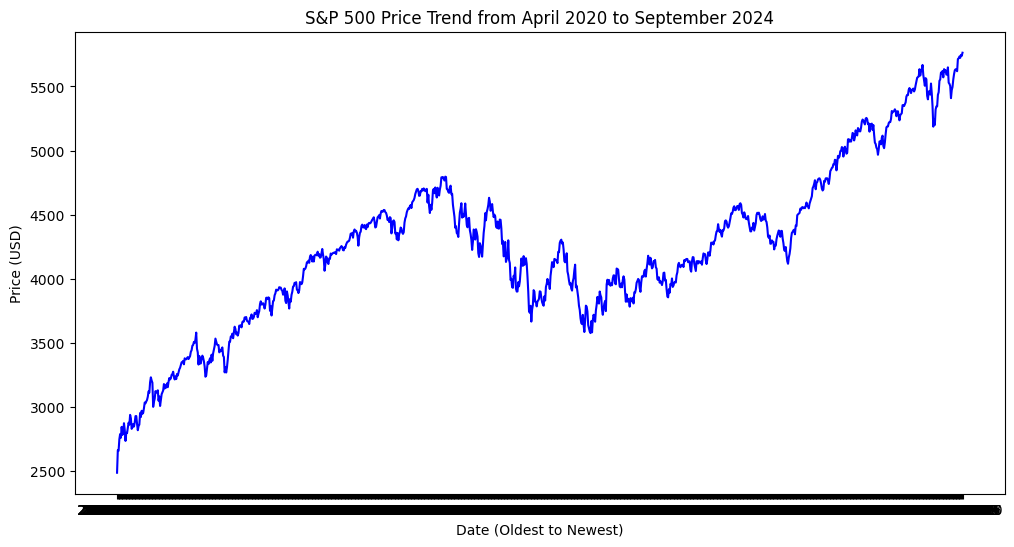

In [44]:
df_sorted = df.sort_values(by="Date", ascending=True)
plt.figure(figsize=(12, 6))
plt.plot(df_sorted["Date"], df_sorted["PX_LAST"], color="blue", linewidth=1.5)

# Format y-axis to show natural numbers
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Date (Oldest to Newest)")
plt.ylabel("Price (USD)")
plt.title("S&P 500 Price Trend from April 2020 to September 2024")
plt.grid(False)
plt.show()

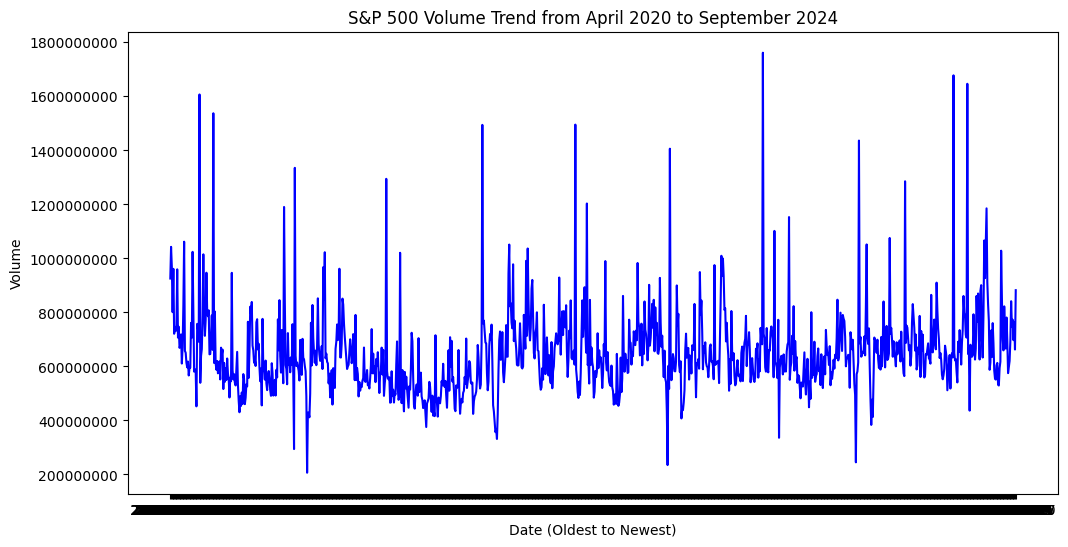

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(df_sorted["Date"], df_sorted["PX_VOLUME_x"], color="blue", linewidth=1.5)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Date (Oldest to Newest)")
plt.ylabel("Volume")
plt.title("S&P 500 Volume Trend from April 2020 to September 2024")
plt.grid(False)
plt.show()

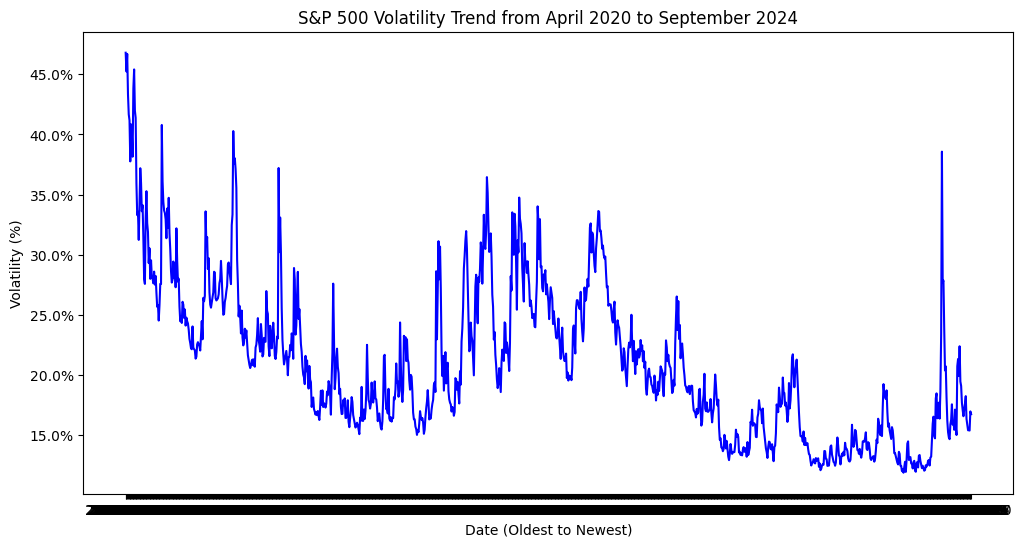

In [46]:
from matplotlib.ticker import PercentFormatter
plt.figure(figsize=(12, 6))
plt.plot(df_sorted["Date"], df_sorted["VIX"], color="blue", linewidth=1.5)
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
plt.xlabel("Date (Oldest to Newest)")
plt.ylabel("Volatility (%)")
plt.title("S&P 500 Volatility Trend from April 2020 to September 2024")
plt.grid(False)
plt.show()

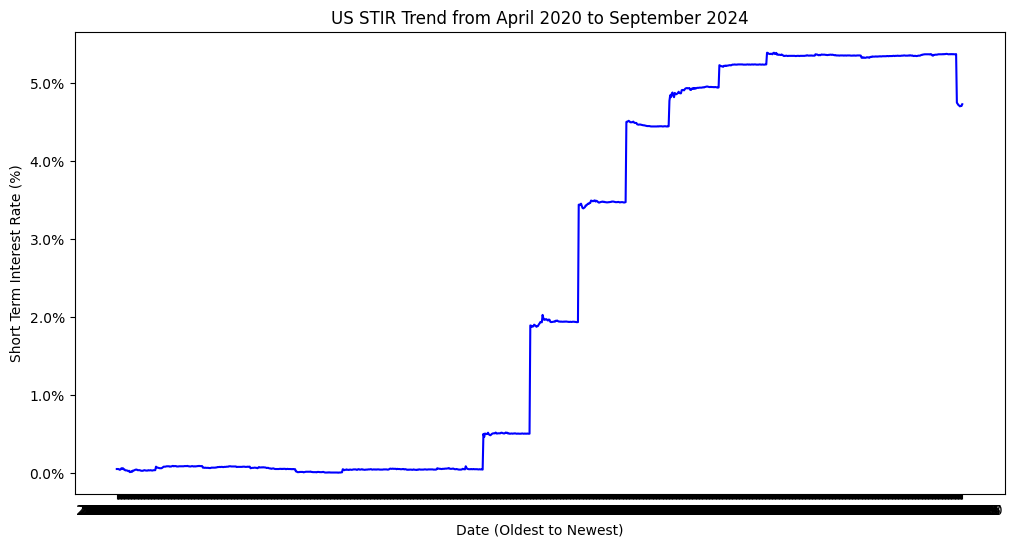

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(df_sorted["Date"], df_sorted["SOFR3M"], color="blue", linewidth=1.5)
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
plt.xlabel("Date (Oldest to Newest)")
plt.ylabel("Short Term Interest Rate (%)")
plt.title("US STIR Trend from April 2020 to September 2024")
plt.grid(False)
plt.show()

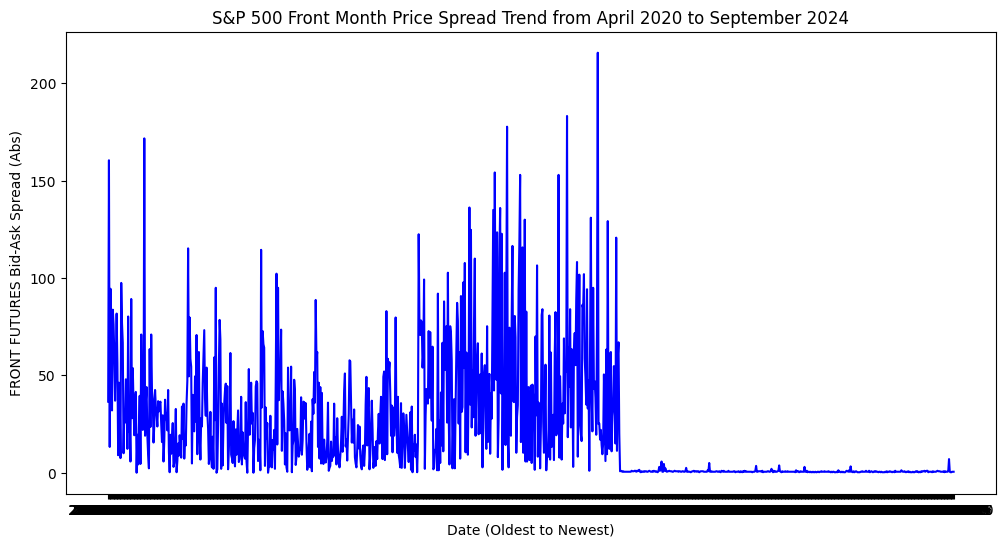

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(df_sorted["Date"], df_sorted["PX_SPREAD"], color="blue", linewidth=1.5)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Date (Oldest to Newest)")
plt.ylabel("FRONT FUTURES Bid-Ask Spread (Abs)")
plt.title("S&P 500 Front Month Price Spread Trend from April 2020 to September 2024")
plt.grid(False)
plt.show()

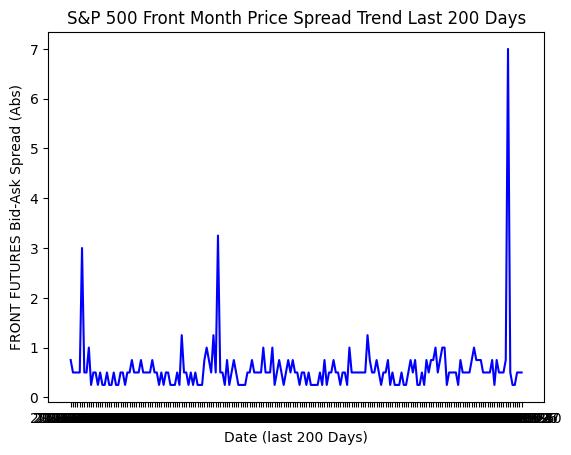

In [49]:
df_tail_200 = df_sorted[['Date', 'PX_SPREAD']].tail(200)
df_tail_200 = df_sorted.loc[df_tail_200.index]
plt.plot(df_tail_200["Date"], df_tail_200["PX_SPREAD"], color="blue", linewidth=1.5)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Date (last 200 Days)")
plt.ylabel("FRONT FUTURES Bid-Ask Spread (Abs)")
plt.title("S&P 500 Front Month Price Spread Trend Last 200 Days")
plt.grid(False)
plt.show()

In [50]:
STDEV = df_tail_200["PX_SPREAD"].std()
lower_bound = df_tail_200["PX_SPREAD"].mean() - 1.645 * STDEV
upper_bound = df_tail_200["PX_SPREAD"].mean() + 1.645 * STDEV
df_tail_200_no_outliers = df_tail_200[(df_tail_200["PX_SPREAD"] >= lower_bound) & (df_tail_200["PX_SPREAD"] <= upper_bound)]
print("Original number of observations for spread:", len(df_tail_200))
print("Number of observations after removing outliers:", len(df_tail_200_no_outliers))


Original number of observations for spread: 200
Number of observations after removing outliers: 197


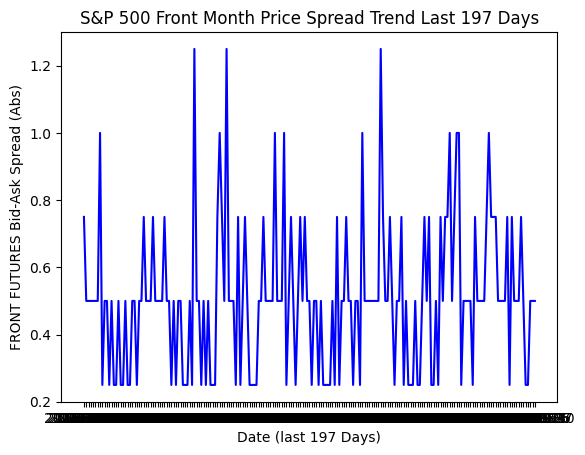

In [51]:
plt.plot(df_tail_200_no_outliers["Date"], df_tail_200_no_outliers["PX_SPREAD"], color="blue", linewidth=1.5)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Date (last 197 Days)")
plt.ylabel("FRONT FUTURES Bid-Ask Spread (Abs)")
plt.title("S&P 500 Front Month Price Spread Trend Last 197 Days")
plt.grid(False)
plt.show()

In [56]:
output_path = '../Clean Data/Spread_Cleaned_US.csv'
df_tail_200_no_outliers.to_csv(output_path, index=False)